Download Data into the Shared Drive from Kaggle

In [ ]:
# !pip install kaggle

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
# from google.colab import files
# files.upload()  # Upload kaggle.json

KeyboardInterrupt: 

In [ ]:
# # Set up Kaggle API
# import os
# import zipfile

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# # Download the dataset
# !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# # Unzip
# !unzip gtsrb-german-traffic-sign.zip -d gtsrb_data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/Shared drives'

'CREC AllStaff'   VisualCompGroupProject


In [ ]:
shared_drive_path = "/content/drive/Shared drives/VisualCompGroupProject"

In [ ]:
# !mkdir -p "/content/drive/Shared drives/VisualCompGroupProject/data" # Create data folder
# !mv gtsrb_data "/content/drive/Shared drives/VisualCompGroupProject/data/" # Move unzipped data

mv: cannot stat 'gtsrb_data': No such file or directory


Load Data from the Shared Drive

In [ ]:
import os
from PIL import Image
import numpy as np

def load_gtsrb_train_data(data_dir, img_size=(32, 32)):
    """
    Loads GTSRB dataset from the given directory.

    Args:
        data_dir (str): Path to the 'Train' directory.
        img_size (tuple): Size to resize images to.

    Returns:
        X: List of image arrays.
        y: List of integer labels.
    """
    X = []
    y = []

    for label in sorted(os.listdir(data_dir)):
        label_path = os.path.join(data_dir, label)
        if not os.path.isdir(label_path):
            continue  # skip any files

        for img_file in os.listdir(label_path):
            if img_file.endswith(('.ppm', '.png', '.jpg')):
                img_path = os.path.join(label_path, img_file)
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(img_size)
                    X.append(np.array(img))
                    y.append(int(label))
                except Exception as e:
                    print(f"Error reading {img_path}: {e}")

    return np.array(X), np.array(y)

In [ ]:
train_dir = '/content/drive/Shared drives/VisualCompGroupProject/data/gtsrb_data/Train'
X_train, y_train = load_gtsrb_train_data(train_dir)

print("Total images loaded:", len(X_train))
print("Shape of first image:", X_train[0].shape)
print("Labels:", np.unique(y_train))

Total images loaded: 39209
Shape of first image: (32, 32, 3)
Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
import pandas as pd
import os
from PIL import Image
import numpy as np

def load_gtsrb_test_data(test_dir, csv_path, img_size=(32, 32)):
    """
    Loads GTSRB test dataset using the 'Path' and 'ClassId' columns in Test.csv.

    Args:
        test_dir (str): Path to the 'Test' folder containing images.
        csv_path (str): Path to Test.csv file.
        img_size (tuple): Size to resize images to.

    Returns:
        X_test: Numpy array of test image arrays.
        y_test: Numpy array of corresponding class labels.
    """
    df = pd.read_csv(csv_path)
    X_test = []
    y_test = []

    for _, row in df.iterrows():
        img_filename = os.path.basename(row['Path'])  # Extract '00000.png' from 'Test/00000.png'
        label = row['ClassId']
        img_path = os.path.join(test_dir, img_filename)

        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize(img_size)
            X_test.append(np.array(img))
            y_test.append(label)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

    return np.array(X_test), np.array(y_test)

In [ ]:
test_dir = '/content/drive/Shared drives/VisualCompGroupProject/data/gtsrb_data/Test'
csv_path = '/content/drive/Shared drives/VisualCompGroupProject/data/gtsrb_data/Test.csv'

X_test, y_test = load_gtsrb_test_data(test_dir, csv_path)

print("Total test images loaded:", len(X_test))
print("Shape of first test image:", X_test[0].shape)
print("Unique labels in test set:", np.unique(y_test))

Total test images loaded: 12630
Shape of first test image: (32, 32, 3)
Unique labels in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [ ]:
# Cache .npy files to Drive for future usage
np.save('/content/drive/Shared drives/VisualCompGroupProject/X_train.npy', X_train)
np.save('/content/drive/Shared drives/VisualCompGroupProject/y_train.npy', y_train)
np.save('/content/drive/Shared drives/VisualCompGroupProject/X_test.npy', X_test)
np.save('/content/drive/Shared drives/VisualCompGroupProject/y_test.npy', y_test)

How big is the data? Data structures? How many iamge data per class (from 0 to 43)?

# How many image data per class (from 0 to 42)?

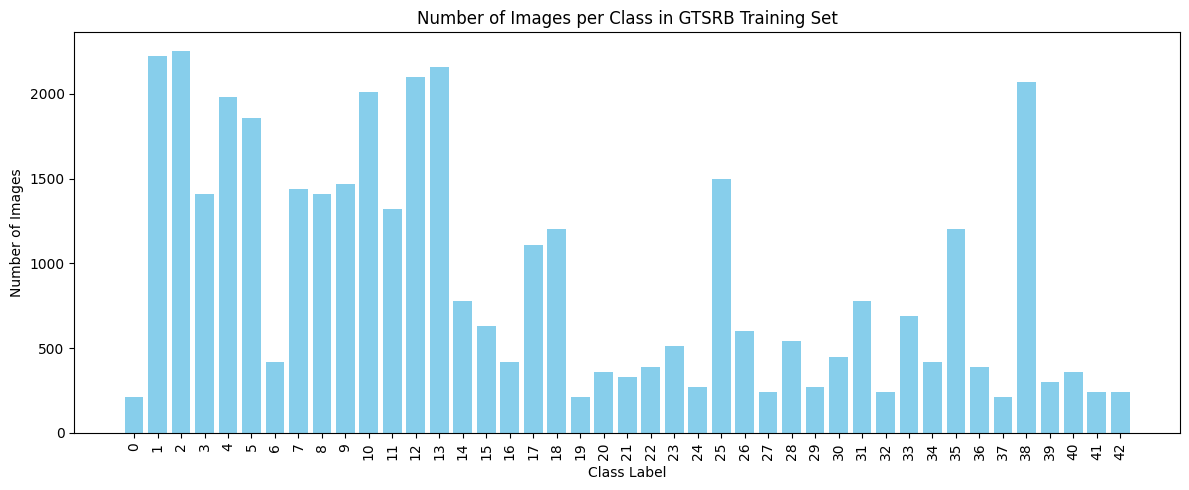

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count how many images per class
labels, counts = np.unique(y_train, return_counts=True)

# Plot the distribution
plt.figure(figsize=(12, 5))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in GTSRB Training Set')
plt.xticks(labels, rotation=90)
plt.tight_layout()
plt.show()